# Single mode example scripts

Here we demonstrate the basic usage of Damysos.jl to run SBEs for single points in k-space.

## Load & update package
Use update with caution, sometimes packages may implement breaking changes. If unsure, only 
use `Pkg.resolve()`

In [1]:
using Damysos

In [2]:
pwd()

"/misc/rz_cloud/richter/how09898/.julia/dev/Damysos/jupyter"

In [2]:
using Pkg
Pkg.update()

    Updating registry at `~/.julia/registries/General.toml`
   Installed AdaptivePredicates ──────── v1.1.1
   Installed SteadyStateDiffEq ───────── v2.3.0
   Installed SparseMatrixColorings ───── v0.3.6
   Installed ArrayInterface ──────────── v7.15.0
   Installed LinearSolve ─────────────── v2.31.1
   Installed SciMLBase ───────────────── v2.48.0
   Installed Revise ──────────────────── v3.5.18
   Installed SymbolicIndexingInterface ─ v0.3.27
   Installed DelaunayTriangulation ───── v1.1.1
    Updating `/misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/Project.toml`
  [295af30f] ↑ Revise v3.5.17 ⇒ v3.5.18
    Updating `/misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/Manifest.toml`
  [35492f91] ↑ AdaptivePredicates v1.1.0 ⇒ v1.1.1
  [4fba245c] ↑ ArrayInterface v7.14.0 ⇒ v7.15.0
  [927a84f5] ↑ DelaunayTriangulation v1.1.0 ⇒ v1.1.1
  [7ed4a6bd] ↑ LinearSolve v2.30.2 ⇒ v2.31.1
  [295af30f] ↑ Revise v3.5.17 ⇒ v3.5.18
  [0bca4576] ↑ SciMLBase v2.46.0 ⇒ v2.48.0
  [0a514795] ↑ Sp

## Massive Dirac Hamiltonian
$$ \hat{H} = k_x\sigma_x + k_y\sigma_y + m\sigma_z $$
Don't be confused that here is no $ \zeta $, internally there is rescaling happening to
set that factor to 1. (via `scaledriving_frequency(freq,vf)`)

In [3]:
vf        = u"4.3e5m/s"
freq      = u"25THz"
m         = u"259.0meV"
emax      = u"0.1MV/cm"
t2        = Inf*u"1s"
t1        = Inf*u"1s"
σ         = u"80.0fs"

80.0 fs

In [4]:
dt      = 0.01
kx      = 0.0
ky      = 0.0

0.0

In [5]:
us      = scaledriving_frequency(freq,vf)
h       = GappedDirac(energyscaled(m,us))
l       = TwoBandDephasingLiouvillian(h,timescaled(t1,us),timescaled(t2,us))
df      = GaussianAPulse(us,σ,freq,emax)
atol    = 1e-12
rtol    = 1e-8
pars    = NumericalParamsSingleMode(kx,ky,dt,-5df.σ,atol,rtol)
obs     = [Velocity(pars),Occupation(pars)]

2-element Vector{Observable{Float64}}:
 Velocity{Float64}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
 Occupation{Float64}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [16]:
sim = Simulation(l,df,pars,obs,us,"mysinglemode","mydatapath","myplotpath")

Simulation{Float64} (0d):
 TwoBandDephasingLiouvillian(GappedDirac)
   Hamiltonian: GappedDirac
   m: 15.739610760022567
   vF: 1.0
  t1: Inf
  t2: Inf
 GaussianAPulse:
  σ: 2.0
  ν: 1.0000000000000002
  ω: 6.283185307179587
  eE: 10.452560041404947
  φ: 0.0
  ħω: 6.283185307179587
  θ: 0.0
 NumericalParamsSingleMode:
  kx: 0.0
  ky: 0.0
  kxmax: 0.0
  kymax: 0.0
  kxsamples: [0.0]
  kysamples: [0.0]
  dt: 0.01
  t0: -10.0
  rtol: 1.0e-12
  atol: 1.0e-8
  tsamples: -10.0:0.01:10.0
  tspan: (-10.0, 10.0)
  nt: 2001
 Observables:
  Velocity
  Occupation
 UnitScaling:
  timescale: 40.0 fs
  lengthscale: 17.2 nm
 id: "mysinglemode"
 datapath: "mydatapath"
 plotpath: "myplotpath"


In [17]:
solver = SingleMode()
fns    = define_functions(sim,solver)
res    = run!(sim,fns,solver;savedata=true,saveplots=true)

┌ Info: ## Simulation{Float64}(0d)TwoBandDephasingLiouvillian(GappedDirac)_GaussianAPulse (id: mysinglemode)
│ 
│ Starting on **pc1042350191** at **2024-07-31T15:18:04.806**:
│ 
│ * threads: 1
│ * processes: 1
│ * plotpath: myplotpath
│ * datapath: mydatapath
│ 
│ | Parameter | Value (SI units) | Value (scaled) |
│ |-----------|------------------|----------------|
│ | ζ | 1.06 |   |
│ | γ | 4.73 |   |
│ | M | 5.01 |   |
│ | plz | 2.57e-33 |   |
│ | m | 259.0 meV  | 15.739610760022567 |
│ | vF | 430000.0 m s^-1  | 1.0 |
│ | t2 | Inf fs  |   |
│ | σ | 80.0 fs  | 2.0 |
│ | ω | 0.157 fs^-1  | 6.28 |
│ | ν | 25.0 THz  | 1.0 |
│ | eE | 0.1 MV cm^-1  | 10.5 |
│ | φ | 0.0  | 0.0 |
│ | ħω | 0.103 eV  | 6.28 |
│ | kx | 0.0 Å^-1  | 0.0 |
│ | ky | 0.0 Å^-1  | 0.0 |
│ | t0 | -400.0 fs  |   |
│ | dt | 0.4 fs  | 0.01 |
│ | nt | 2000.0  | 2000.0 |
│ | rtol | 1.0e-12  |   |
│ | atol | 1.0e-8  |   |
│ 
└ @ Damysos /misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/src/Core.jl:72
┌ Info:     Solver: 

2-element Vector{Observable{Float64}}:
 Velocity{Float64}([3.938835021095095e-7, 3.940398114525819e-7, 3.950701345099558e-7, 3.976329714182776e-7, 4.0208497887048175e-7, 4.0843539816043975e-7, 4.163346284647653e-7, 4.2509859576481686e-7, 4.3376663804410954e-7, 4.411867744403279e-7  …  -1.5159339255702483e-5, -1.683871932157656e-5, -1.6821846854013943e-5, -1.511005189961878e-5, -1.187150145140486e-5, -7.424575541256582e-6, -2.2065334484837996e-6, 3.269358169059327e-6, 8.464301523404806e-6, 1.2866986940898762e-5], [3.938835021095095e-7, 4.030527572278246e-7, 4.10792669561277e-7, 4.169937310638394e-7, 4.2154825367603666e-7, 4.243509799583529e-7, 4.2529971246163824e-7, 4.2429595968636436e-7, 4.2124559629454406e-7, 4.1605953505240316e-7  …  4.1605953498714446e-7, 4.2124559622843595e-7, 4.24295959619755e-7, 4.252997123948641e-7, 4.243509798917331e-7, 4.215482536098686e-7, 4.169937309983959e-7, 4.1079266949680614e-7, 4.030527571645509e-7, 3.9388350204763764e-7], [0.0, -9.012945775242734e-9, -

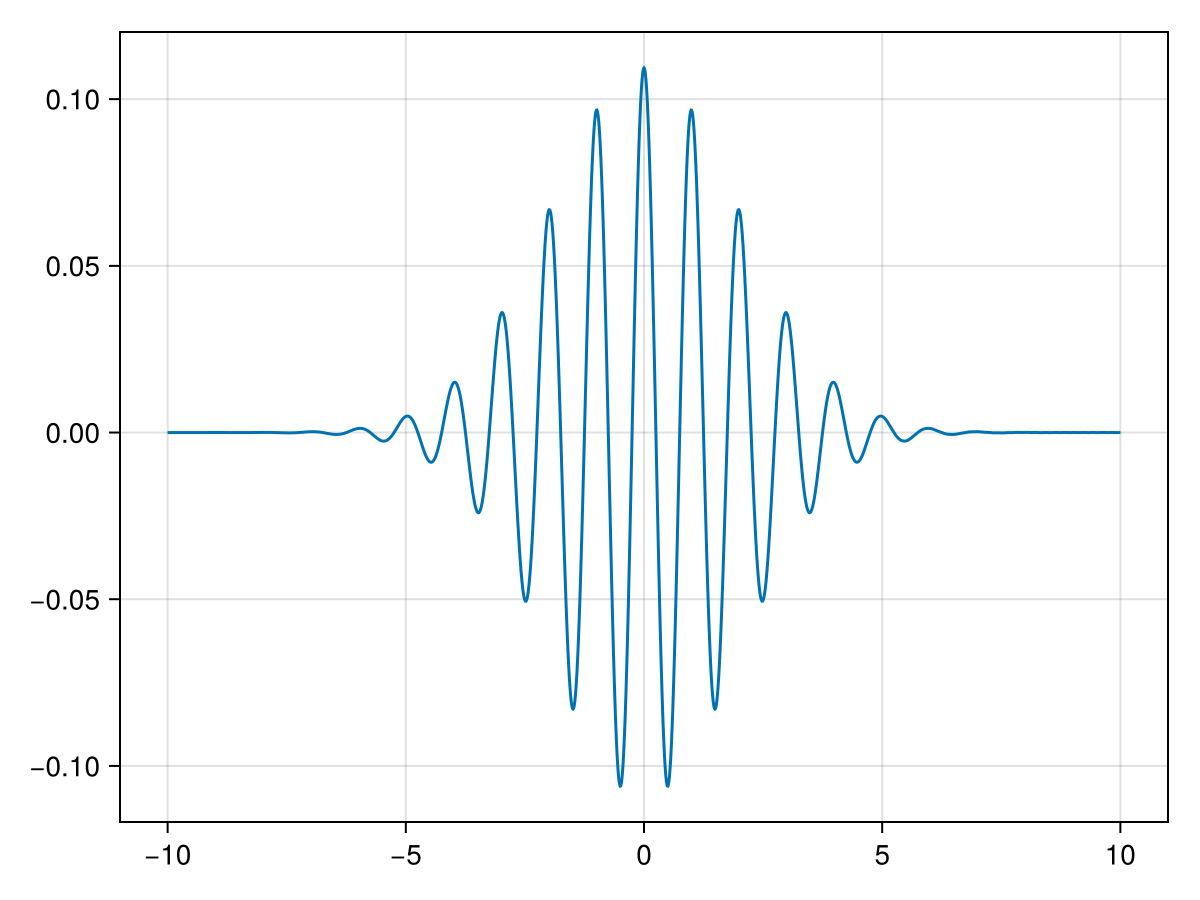

In [22]:
using CairoMakie
ts = gettsamples(sim)
vx = sim.observables[1].vx
lines(ts,vx)

In [25]:
sim.liouvillian

TwoBandDephasingLiouvillian(GappedDirac)
  Hamiltonian: GappedDirac
  m: 15.739610760022567
  vF: 1.0
 t1: Inf
 t2: Inf

## Quadratic Toy Hamiltonian
$$ \hat{H} = \frac{\zeta}{2}(k_x^2\sigma_x + k_y^2\sigma_y) + \frac{\Delta}{2}\sigma_z

In [22]:
gap = u"50.0meV"
freq = u"25.0THz"
fieldstrength = u"0.5MV/cm"
lengthscale = uconvert(u"nm",ħ*2π*freq / (q_e*fieldstrength))
effective_mass = m_e


9.1093837139e-31 kg

In [23]:
us = UnitScaling(1/freq,lengthscale)

UnitScaling:
 timescale: 40.0 fs
 lengthscale: 2.0678338484619294 nm

In [24]:
h = QuadraticToy(us,gap,effective_mass)

QuadraticToy:
 Δ: 3.038534895757252
 ζ: 1.0829686284533837

In [25]:
l=TwoBandDephasingLiouvillian(h,Inf,Inf)

TwoBandDephasingLiouvillian(QuadraticToy)
  Hamiltonian: QuadraticToy
  Δ: 3.038534895757252
  ζ: 1.0829686284533837
 t1: Inf
 t2: Inf

In [26]:
df=GaussianAPulse(us,1.5/freq,freq,fieldstrength)

GaussianAPulse:
 σ: 1.5
 ν: 1.0000000000000002
 ω: 6.283185307179587
 eE: 6.283185307179586
 φ: 0.0
 ħω: 6.283185307179587
 θ: 0.0

In [27]:
pars = NumericalParamsSingleMode(0.,0.,1e-3,-5df.σ)
obs = [Velocity(pars),Occupation(pars)]

2-element Vector{Observable{Float64}}:
 Velocity{Float64}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
 Occupation{Float64}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [28]:
sim = Simulation(l,df,pars,obs,us,"mysinglemode","mydatapath","myplotpath")

Simulation{Float64} (0d):
 TwoBandDephasingLiouvillian(QuadraticToy)
   Hamiltonian: QuadraticToy
   Δ: 3.038534895757252
   ζ: 1.0829686284533837
  t1: Inf
  t2: Inf
 GaussianAPulse:
  σ: 1.5
  ν: 1.0000000000000002
  ω: 6.283185307179587
  eE: 6.283185307179586
  φ: 0.0
  ħω: 6.283185307179587
  θ: 0.0
 NumericalParamsSingleMode:
  kx: 0.0
  ky: 0.0
  kxmax: 0.0
  kymax: 0.0
  kxsamples: [0.0]
  kysamples: [0.0]
  dt: 0.001
  t0: -7.5
  rtol: 1.0e-10
  atol: 1.0e-12
  tsamples: -7.5:0.001:7.5
  tspan: (-7.5, 7.5)
  nt: 15001
 Observables:
  Velocity
  Occupation
 UnitScaling:
  timescale: 40.0 fs
  lengthscale: 2.0678338484619294 nm
 id: "mysinglemode"
 datapath: "mydatapath"
 plotpath: "myplotpath"


In [29]:
solver = SingleMode()
fns    = define_functions(sim,solver)
res    = run!(sim,fns,solver;savedata=true,saveplots=true)

┌ Info: ## Simulation{Float64}(0d)TwoBandDephasingLiouvillian(QuadraticToy)_GaussianAPulse (id: mysinglemode)
│ 
│ Starting on **pc1042350191** at **2024-08-09T14:42:48.109**:
│ 
│ * threads: 1
│ * processes: 1
│ * Solver: SingleMode()
│ * plotpath: myplotpath
│ * datapath: mydatapath
│ 
│ | Parameter | Value (SI units) | Value (scaled) |
│ |-----------|------------------|----------------|
│ | M | 0.484 |   |
│ | Δ | 50.0 meV  | 3.038534895757252 |
│ | m* | 3.2500000000000003e-31 kg  | 0.923387782181767 |
│ | t2 | Inf fs  |   |
│ | σ | 60.0 fs  | 1.5 |
│ | ω | 0.157 fs^-1  | 6.28 |
│ | ν | 25.0 THz  | 1.0 |
│ | eE | 0.5 MV cm^-1  | 6.28 |
│ | φ | 0.0  | 0.0 |
│ | ħω | 0.103 eV  | 6.28 |
│ | kx | 0.0 Å^-1  | 0.0 |
│ | ky | 0.0 Å^-1  | 0.0 |
│ | t0 | -300.0 fs  |   |
│ | dt | 0.04 fs  | 0.001 |
│ | nt | 15000.0  | 15000.0 |
│ | rtol | 1.0e-10  |   |
│ | atol | 1.0e-12  |   |
│ 
└ @ Damysos /home/how09898/dev/Damysos/src/Core.jl:133
┌ Info: Saving simulation data
└ @ Damysos /home/how0989

2-element Vector{Observable{Float64}}:
 Velocity{Float64}([-1.9976732423976913e-17, -2.0043032748448852e-17, -2.0108751497932473e-17, -2.017388265466954e-17, -2.023842019239906e-17, -2.0302358075887266e-17, -2.0365690260447668e-17, -2.0428410691452918e-17, -2.0490513303838744e-17, -2.0551992021598535e-17  …  1.4229284018642923e-8, 1.4227170233781191e-8, 1.422424167231698e-8, 1.42205005567053e-8, 1.421594918621993e-8, 1.4210589936226207e-8, 1.4204425257452004e-8, 1.419745767525284e-8, 1.4189689788878279e-8, 1.4181124270728582e-8], [-1.9976732423976913e-17, -2.017629363551231e-17, -2.0375407809069104e-17, -2.0574022314415585e-17, -2.0772083982766707e-17, -2.0969539119587437e-17, -2.1166333517830515e-17, -2.1362412471614896e-17, -2.1557720790344645e-17, -2.1752202813266945e-17  …  -2.17519623994639e-17, -2.1557482526032536e-17, -2.1362176365926268e-17, -2.1166099579282724e-17, -2.0969307356087852e-17, -2.0771854401618073e-17, -2.0573794922321518e-17, -2.0375182612139776e-17, -2.0176070639